<a href="https://colab.research.google.com/github/Hitansh159/match-filter/blob/main/Base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

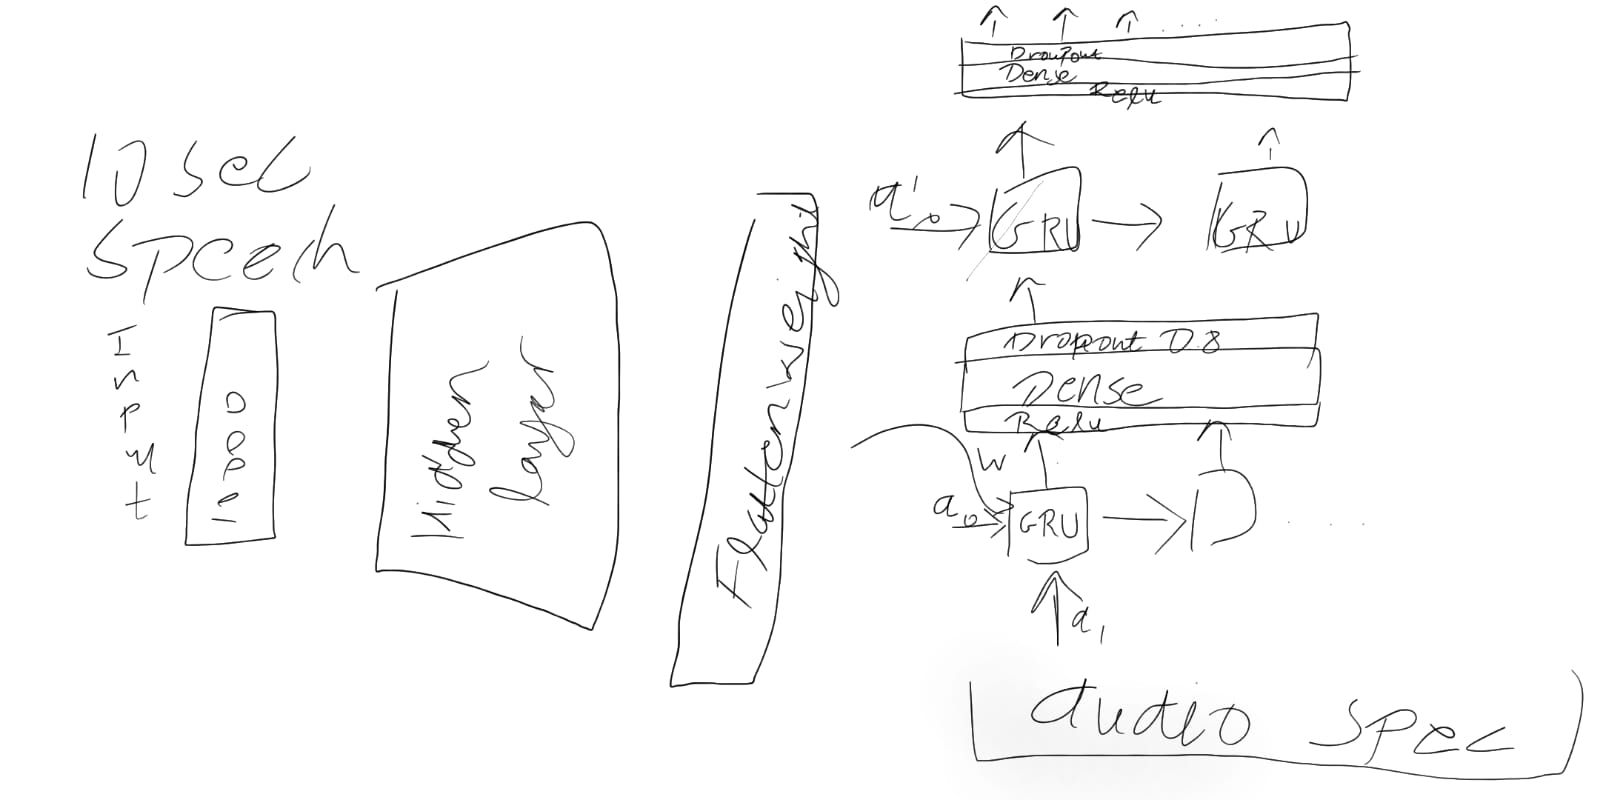

In [ ]:
!cp drive/MyDrive/dataset.zip ./

In [ ]:
!unzip *.zip

In [ ]:
!du -sh ./dataset/*.csv

515M	./dataset/target.csv


In [ ]:
!du -sh ./dataset/'narendra modi'

345M	./dataset/narendra modi


In [ ]:
# !du -sh ./dataset

860M	./dataset


In [ ]:
!pip install tensorflow_io

In [ ]:
import tensorflow as tf
import numpy as np
import librosa
import os 
import pandas as pd
import numpy as np
import soundfile as sf

In [ ]:
dataset_frame = pd.read_csv('./dataset/target.csv')

In [ ]:
dataset_frame.rename(columns={'Unnamed: 0': 'filename'}, inplace=True)

In [ ]:
dataset_frame['filename'] = dataset_frame['filename'].apply(lambda x: f'./dataset/narendra modi/{x}.wav')

In [ ]:
def convert_string_to_array(s):
  return tf.convert_to_tensor(librosa.stft(np.array(list(map(lambda x : float(x), s[1:-1].split(',') )))).reshape(431, -1), dtype='float64')

In [ ]:
dataset_frame['y'] = dataset_frame['y'].apply(convert_string_to_array)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/constant_op.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
# dataset_frame

In [ ]:
# Y = dataset_frame['y'].to_numpy()

In [ ]:
# X = []
# for i in range(dataset_frame.shape[0]):
#   audio, sr = librosa.load(dataset_frame['filename'][i])
#   x = librosa.stft(audio)
  # X.append(x)

In [ ]:
# Y = tf.convert_to_tensor(Y, dtype='float64')
# X = tf.convert_to_tensor(X, dtype='float64')

In [ ]:
# files = os.listdir('./dataset/narendra modi/')
# files.sort(key = (lambda x: int(x.split('.')[0])))
# for audiofile in files:
  # y, sr =  librosa.load('./')

In [ ]:
# it = tf.io.gfile.glob('./dataset/narendra modi/*.wav')

In [ ]:
# it[0]

'./dataset/narendra modi/109.wav'

In [ ]:
# y, sr =  librosa.load('./dataset/narendra modi/0.wav')

1.0934104673345016e-05

In [ ]:
# x = tf.convert_to_tensor(temp.reshape(1, 431, -1), dtype='float64')
# x

In [ ]:
def dataloader(total):
  item = 0
  while item < total:
    audio, sr = librosa.load(dataset_frame['filename'][item])
    x = tf.convert_to_tensor(librosa.stft(audio).reshape(431, 1025), dtype='float64')
    yield x, dataset_frame['y'][item]
    item += 1

In [ ]:
ds_genrator = tf.data.Dataset.from_generator(dataloader, args=[816], output_types=(tf.float64, tf.float64),
                                             output_shapes=(
                                                            tf.TensorShape((431, 1025)),
                                                            tf.TensorShape((431, 1025))))

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.LSTM(1025, activation='tanh', return_sequences=True))
model.add(tf.keras.layers.Dense(1025))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.LSTM(1025, activation='tanh', return_sequences=True))
model.add(tf.keras.layers.Dense(1025))
model.add(tf.keras.layers.Dropout(0.8))

In [ ]:
model.build([32, 431, 1025])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (32, 431, 1025)           8409100   
_________________________________________________________________
dense (Dense)                (32, 431, 1025)           1051650   
_________________________________________________________________
dropout (Dropout)            (32, 431, 1025)           0         
_________________________________________________________________
lstm_1 (LSTM)                (32, 431, 1025)           8409100   
_________________________________________________________________
dense_1 (Dense)              (32, 431, 1025)           1051650   
_________________________________________________________________
dropout_1 (Dropout)          (32, 431, 1025)           0         
Total params: 18,921,500
Trainable params: 18,921,500
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer= 'adam', loss='mse', metrics=['mse'])

In [ ]:
model.fit(x= ds_genrator.batch(32), batch_size=32, epochs=5, verbose=1)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/constant_op.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


26/26 [==============================] - 59s 2s/step - loss: 440.3305 - mse: 440.3305
Epoch 2/5
26/26 [==============================] - 49s 2s/step - loss: 427.5185 - mse: 427.5185
Epoch 3/5
26/26 [==============================] - 50s 2s/step - loss: 417.9870 - mse: 417.9870
Epoch 4/5
26/26 [==============================] - 50s 2s/step - loss: 412.8593 - mse: 412.8593
Epoch 5/5
26/26 [==============================] - 51s 2s/step - loss: 409.9826 - mse: 409.9826


In [ ]:
pred = model.predict(ds_genrator.batch(32))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/constant_op.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
temp = librosa.istft(pred[0], length=220500)

In [ ]:
import IPython
IPython.display.Audio(temp, rate= 22050)

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

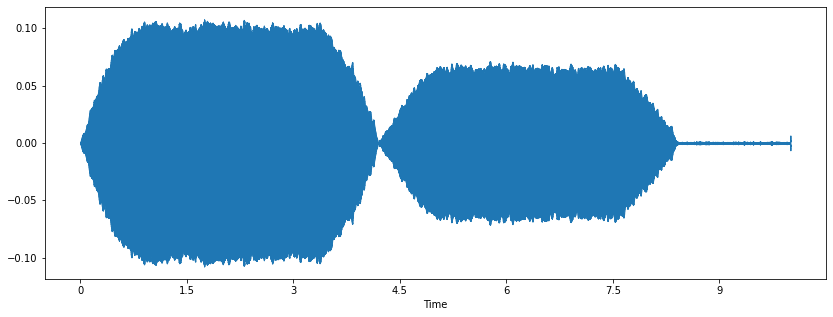

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(temp)

In [ ]:
for i in ds_genrator.batch(32).take(1):
  x_ = i[0][0]
  y_ = i[1][0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/constant_op.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
IPython.display.Audio(x_, rate=22050)

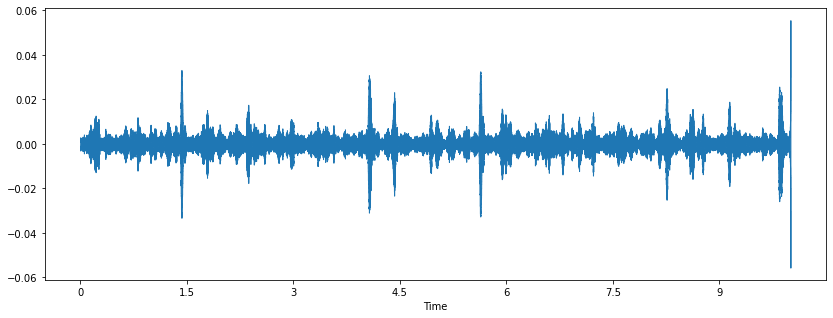

In [ ]:
x_ = librosa.istft(x_.numpy(), length=220500)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_)

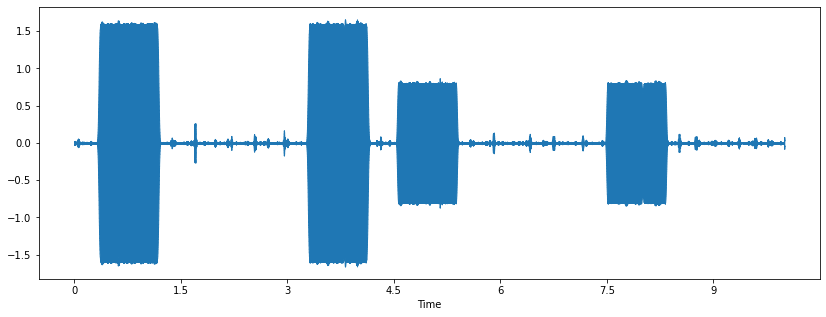

In [ ]:
y_ = librosa.istft(y_.numpy(), length=220500)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_)